In [293]:
import pandas as pd
import numpy as np
import missingno as msno

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## General Project Overview
goal is to predict diabetic diagnosis of data set of all female participates using a number of various bio features. 

# Basic Data Science and ML Pipeline
 <u> 
 OSEMN Pipeline 
 </u> 


O - Obtaining our data <br>
S - Scrubbing / Cleaning our data \n <br>
E - Exploring / Visualizing our data will allow us to find patterns and trends \n <br>
M - Modeling our data will give us our predictive power as a wizard \n <br>
N - Interpreting our data <br>

In [295]:
df = pd.read_csv('/Users/connortluck/Desktop/CSV_files/diabetes.csv')

In [ ]:
df['DataFrame Column'] = df['DataFrame Column'].astype(float)


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [442]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


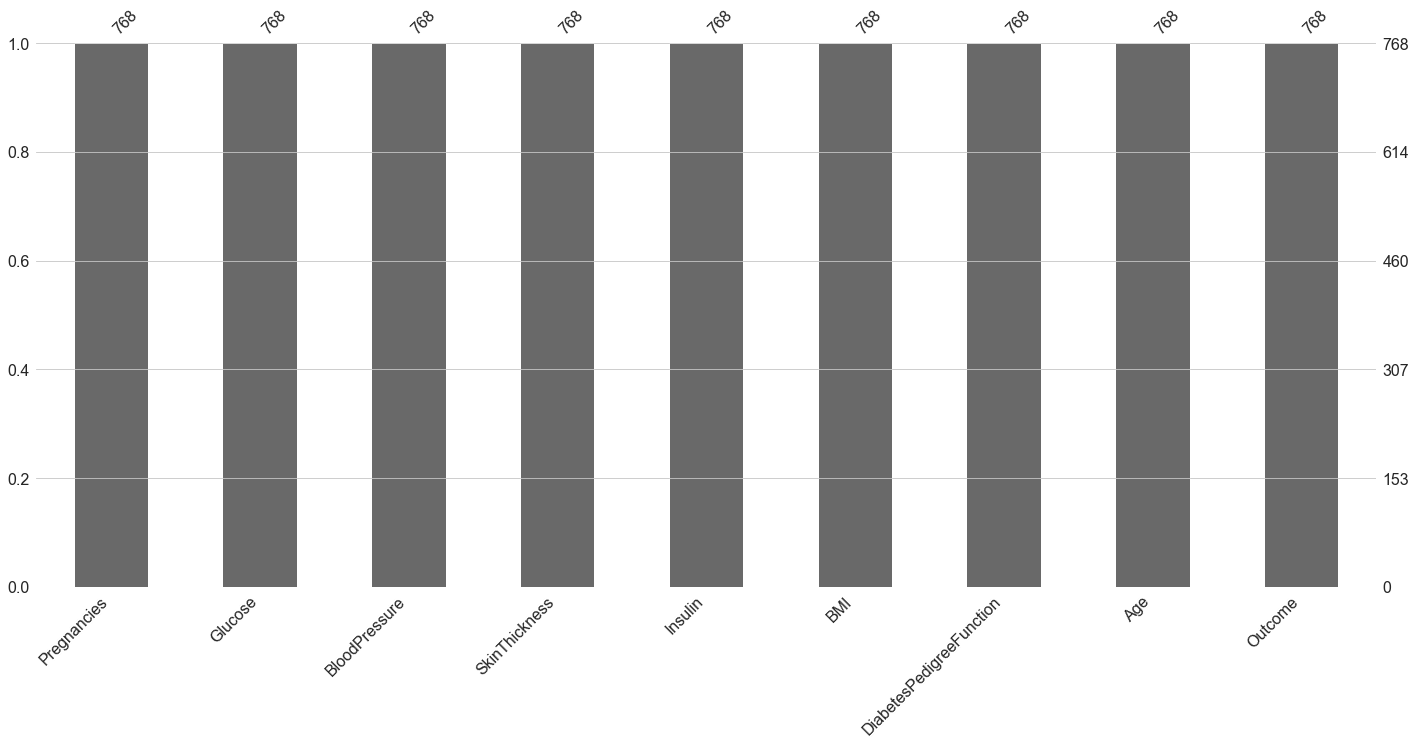

In [458]:
msno.bar(df)

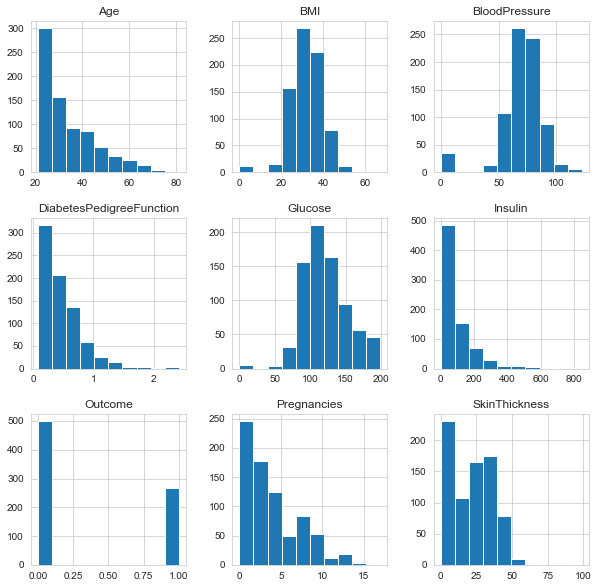

In [447]:
p = df.hist(figsize = (10,10))


In [452]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [456]:
df_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

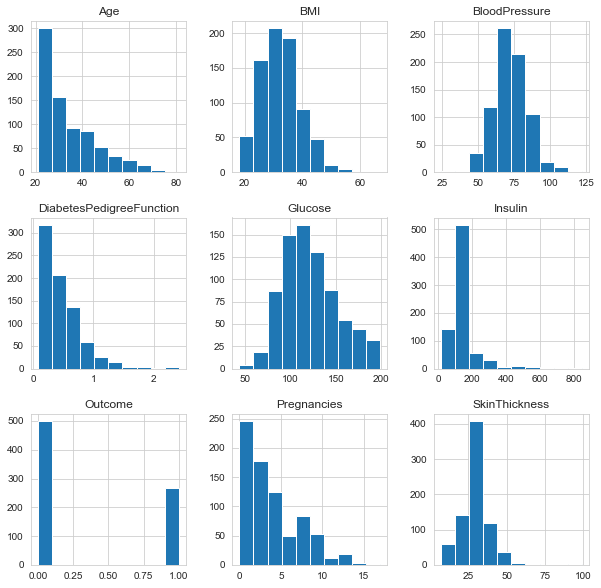

In [459]:
p = df_copy.hist(figsize = (10,10))


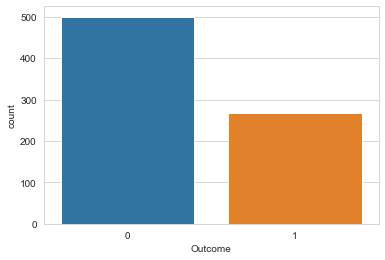

In [463]:
#check the balance of the data
sns.countplot(df['Outcome'])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


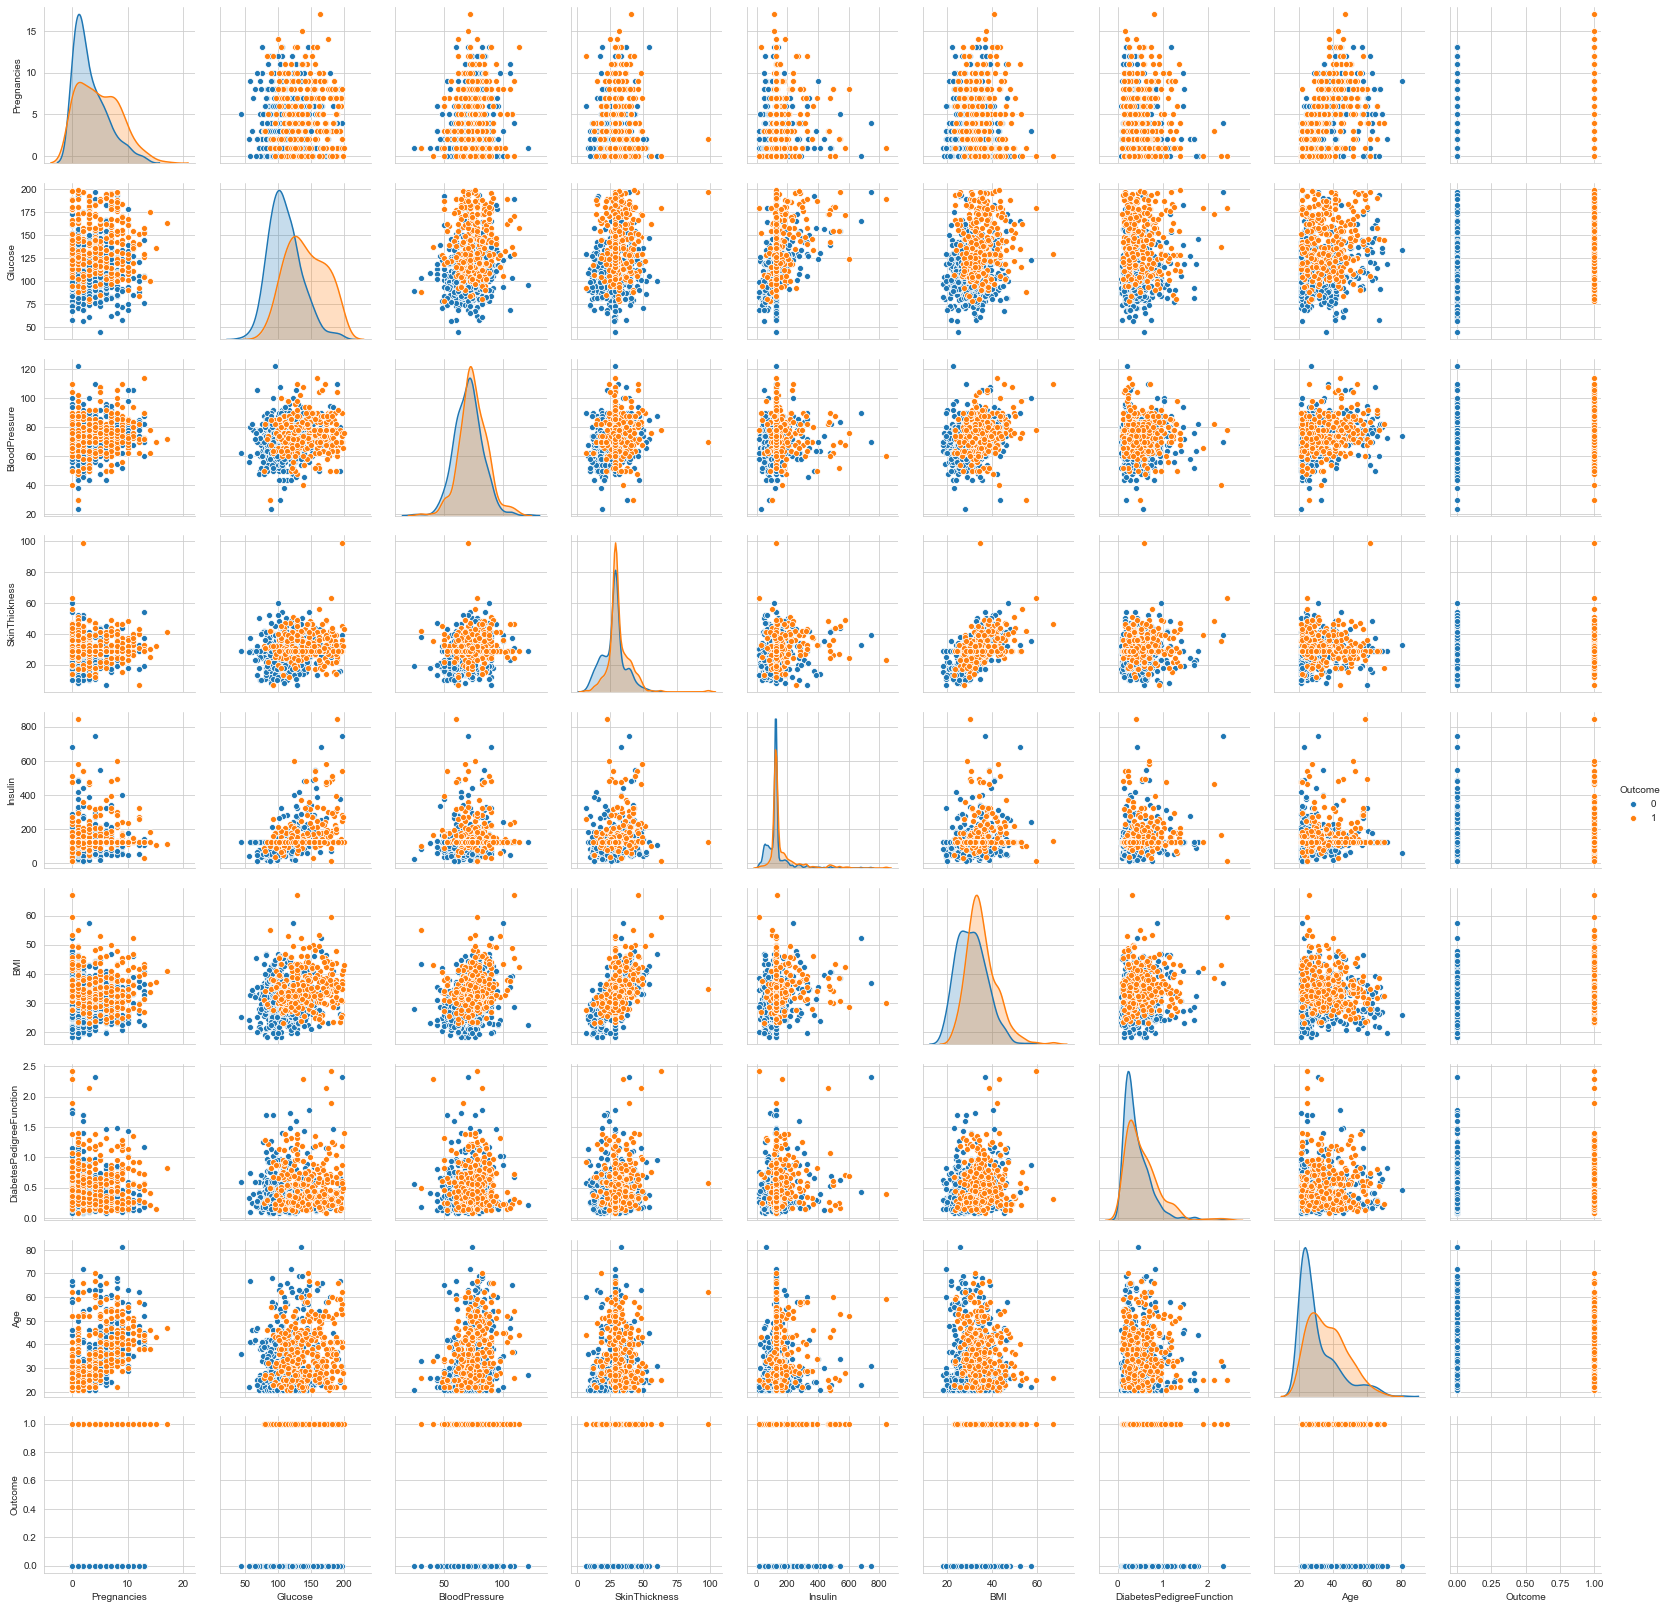

In [465]:
#pairplot can show groups of outcome info broken down by feature distribution
pair = sns.pairplot(df_copy, hue = 'Outcome')

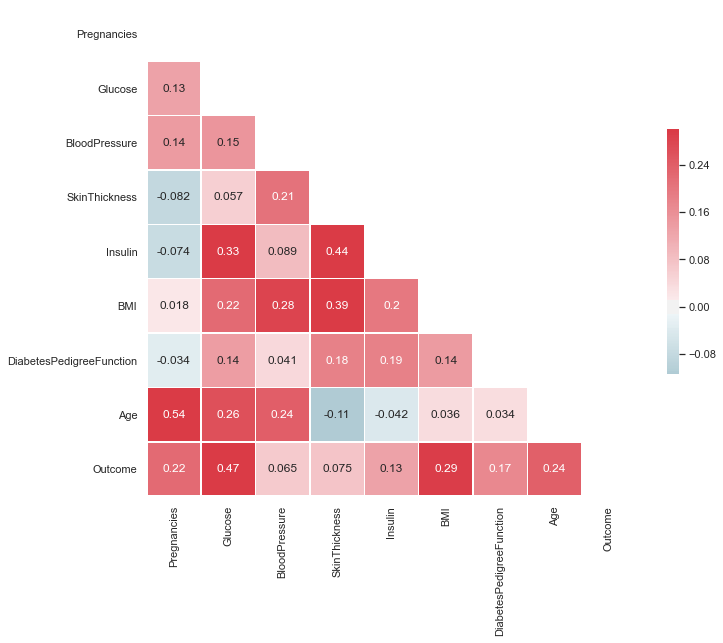

In [485]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
x = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)


## Logistic Regression Model Fit
Unmodified Model, Unscaled Data.

In [378]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [390]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=500)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [391]:
predictions = logmodel.predict(X_test)

In [392]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions).reshape(2,2)

array([[132,  18],
       [ 32,  49]])

In [393]:
# confusion_mtx = confusion_matrix(y_test,predictions).reshape(2,2)
# sns.heatmap(confusion_mtx, annot=True,cmap='Blues')


In [394]:
#logistic Regression Results
from sklearn.metrics import classification_report


In [395]:
print('With Untuned Logistic Regression')
print('\n')
print('Confusion_Matrix:')
print('\n')
print(confusion_matrix(y_test,predictions))
print('-'*60)
print('Classification Report:')
print('\n')
print(classification_report(y_test,predictions))

With Untuned Logistic Regression


Confusion_Matrix:


[[132  18]
 [ 32  49]]
------------------------------------------------------------
Classification Report:


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## Logistic Regression Discussion
Logistic Regression Model with no modification came out with 80% accuracy and an f1-score of 0.8 as well. This leaves a significant amount of room for improvemnet. To start I am going to try to do some hyperparameter tuning for the C Variable of the Logistic Regression Model.

## Scale Data
Model will be tuned later so we will scale the data

In [403]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [408]:
X=df_feat
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [498]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.2,0.3,0.4,0.4,0.6,0.7,0.8,0.9,1,2,3,4,5,610,100]}

In [410]:
grid = GridSearchCV(LogisticRegression(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................................ C=0.2, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] C=0.4 ...........................................................
[CV] ............................................ C=0.4, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.5s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.4, 0.6, 0.7, 0.8, 0.9, 1,
                               2, 3, 4, 5, 610, 100]},
             verbose=2)

In [411]:
grid_predictions = grid.predict(X_test)

In [412]:
print('With Tuned Logistic Regression')
print('\n')
print('Confusion_Matrix:')
print('\n')
print(confusion_matrix(y_test,grid_predictions))
print('-'*60)
print('Classification Report:')
print('\n')
print(classification_report(y_test,grid_predictions))

With Tuned Logistic Regression


Confusion_Matrix:


[[133  17]
 [ 32  49]]
------------------------------------------------------------
Classification Report:


              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



## C Value Tuning Conclussions:
Does not effect model accuracy


## Decision Tree and Random Forrest Classifier
I will now compare my Logistic Regression Results to that of a decision Tree and Random Forest Classifier. NOTE: using unscaled data.

In [415]:
#return to unscaled data test/train
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [416]:
#decision tree lost accuracy from logistic regression model. 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)


In [417]:
print('With Decision Tree')
print('\n')
print('Confusion_Matrix:')
print('\n')
print(confusion_matrix(y_test,pred))
print('-'*60)
print('Classification Report:')
print('\n')
print(classification_report(y_test,pred))

With Decision Tree


Confusion_Matrix:


[[123  27]
 [ 40  41]]
------------------------------------------------------------
Classification Report:


              precision    recall  f1-score   support

           0       0.75      0.82      0.79       150
           1       0.60      0.51      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



In [418]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [419]:
print('With Random Forest')
print('\n')
print('Confusion_Matrix:')
print('\n')
print(confusion_matrix(y_test,pred))
print('-'*60)
print('Classification Report:')
print('\n')
print(classification_report(y_test,pred))

With Random Forest


Confusion_Matrix:


[[123  27]
 [ 40  41]]
------------------------------------------------------------
Classification Report:


              precision    recall  f1-score   support

           0       0.75      0.82      0.79       150
           1       0.60      0.51      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



## KNN Modeling
Attempt to fit KNN model to see if we can get more accurate results following tuning. NOTE: We will used scaled data. 

In [420]:
X=scaled_features
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [421]:
from sklearn.neighbors import KNeighborsClassifier

In [422]:
#create knn model instance with n_neighbors = 1 
knn = KNeighborsClassifier(n_neighbors=1)

In [423]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [424]:
pred = knn.predict(X_test)

In [425]:
print('WITH K=1')
print('\n')
print('Confusion_Matrix:')
print('\n')
print(confusion_matrix(y_test,pred))
print('-'*60)
print('Classification Report:')
print('\n')
print(classification_report(y_test,pred))

WITH K=1


Confusion_Matrix:


[[123  27]
 [ 40  41]]
------------------------------------------------------------
Classification Report:


              precision    recall  f1-score   support

           0       0.75      0.82      0.79       150
           1       0.60      0.51      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



# Tune the KNN Model
Using a loop we will train the KNN models with different k values and keep track of the error ratefor each model with a list.

In [499]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

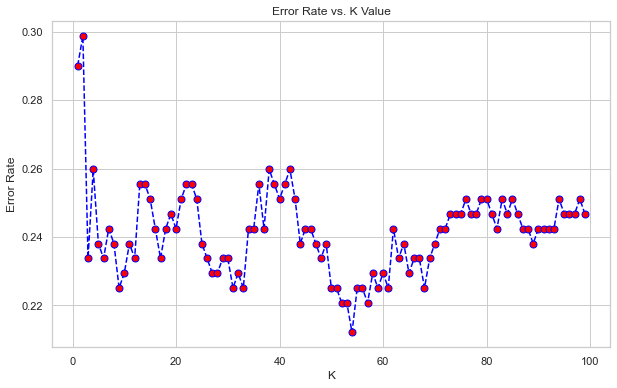

In [500]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [501]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=55)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [502]:
print('WITH K=55')
print('\n')
print('Confusion_Matrix:')
print('\n')
print(confusion_matrix(y_test,pred))
print('-'*60)
print('Classification Report:')
print('\n')
print(classification_report(y_test,pred))

WITH K=55


Confusion_Matrix:


[[144   6]
 [ 46  35]]
------------------------------------------------------------
Classification Report:


              precision    recall  f1-score   support

           0       0.76      0.96      0.85       150
           1       0.85      0.43      0.57        81

    accuracy                           0.77       231
   macro avg       0.81      0.70      0.71       231
weighted avg       0.79      0.77      0.75       231



In [503]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}
